In [32]:
#pacages used in this notebook
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

#pacages from previous notebooks
# from matplotlib import ticker, axis
# from matplotlib.ticker import AutoMinorLocator
# from matplotlib.backends.backend_pdf import PdfPages
# from scipy import optimize
# from scipy import misc
# from scipy import stats

#plot style
plt.style.use("style.mplstyle")
#calculate chi-squared
def chi_squared_np(x, y, y_err, slope, intercept):
    chi2 = np.sum(np.square(y - slope*x-intercept) / np.square(y_err)) 
    return chi2

In [34]:
file = pd.read_csv(r'CL_PE.csv') #read in the data
data = np.genfromtxt('CL_PE.csv')
v_1 = data[0:11,0]
v_2 = data[11:,0]
v_err = 0.001/np.sqrt(12)
i_1 = abs(data[0:11,1])
i_2 = abs(data[11:,1])
i_err = 0.001/np.sqrt(12)

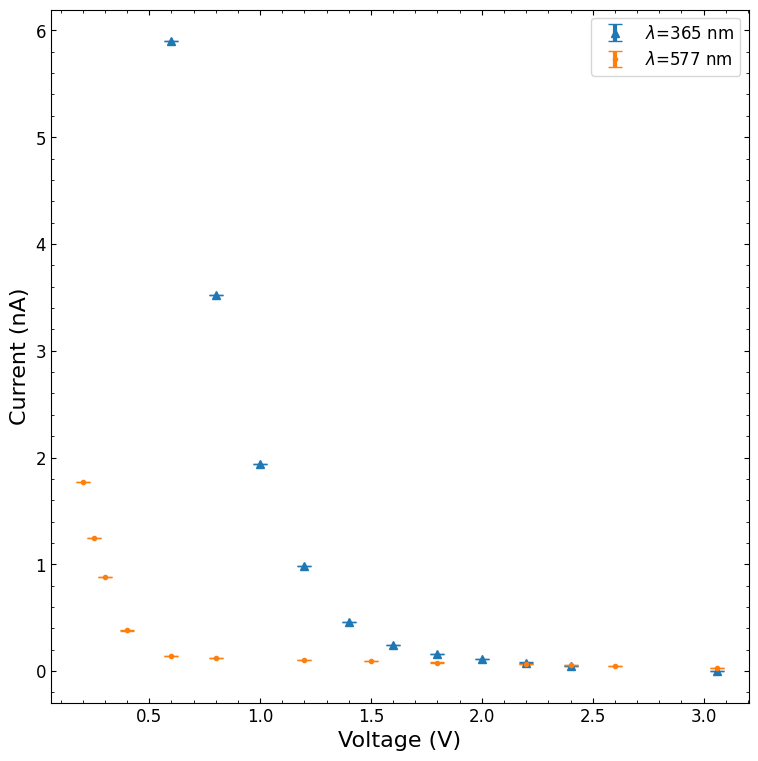

In [35]:
fig, ax=plt.subplots()
plt.errorbar(v_1, i_1, yerr= i_err, label="$\lambda$=365 nm", linestyle='None', marker='^', capsize=5)
plt.errorbar(v_2, i_2, yerr= i_err, label="$\lambda$=577 nm", linestyle='None', marker='.', capsize=5)
plt.legend()
plt.xlabel("Voltage (V)")
plt.ylabel("Current (nA)")
plt.savefig('CL_PE_1.jpg')

In [36]:
vb_1 = v_1[0:6]
ib_1 = i_1[0:6]
vb_2 = v_2[0:9]
ib_2 = i_2[0:9]
print(ib_1,ib_2)

[0.   0.05 0.08 0.11 0.16 0.24] [0.03 0.05 0.06 0.07 0.08 0.09 0.1  0.12 0.14]


In [37]:
vb_s_1 = sm.add_constant(vb_1)
ols_1 = sm.OLS(ib_1, vb_s_1)
res_1 = ols_1.fit()
res_1.summary()

/Users/yizhi_jiao/Documents/GitHub/github/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     28.19
Date:                Sun, 09 Apr 2023   Prob (F-statistic):            0.00605
Time:                        20:19:51   Log-Likelihood:                 13.096
No. Observations:                   6   AIC:                            -22.19
Df Residuals:                       4   BIC:                            -22.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4407      0.064      6.846      0.002       0.262       0.619
x1            -0.1535      0.029     -5.310      0.006      -0.234      -0.073
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.217
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.835
Skew:                           0.634   Prob(JB):                        0.659
Kurtosis:                       1.684   Cond. No.                         12.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
vb_s_2 = sm.add_constant(vb_2)
ols_2 = sm.OLS(ib_2, vb_s_2)
res_2 = ols_2.fit()
res_2.summary()

/Users/yizhi_jiao/Documents/GitHub/github/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     366.5
Date:                Sun, 09 Apr 2023   Prob (F-statistic):           2.64e-07
Time:                        20:19:51   Log-Likelihood:                 35.941
No. Observations:                   9   AIC:                            -67.88
Df Residuals:                       7   BIC:                            -67.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1555      0.004     37.188      0.000       0.146       0.165
x1            -0.0408      0.002    -19.144      0.000      -0.046      -0.036
==============================================================================
Omnibus:                        1.095   Durbin-Watson:                   1.184
Prob(Omnibus):                  0.578   Jarque-Bera (JB):                0.522
Skew:                           0.552   Prob(JB):                        0.770
Kurtosis:                       2.581   Cond. No.                         5.96
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

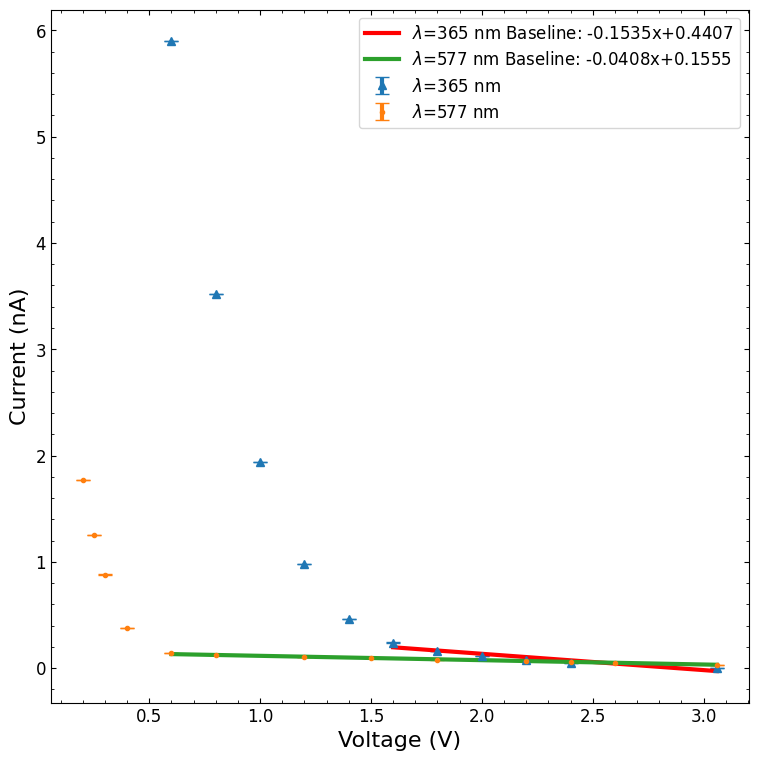

In [39]:
fig, ax=plt.subplots()
slr_1 = LinearRegression().fit(vb_1.transpose().reshape(-1,1), ib_1)
slr_2 = LinearRegression().fit(vb_2.transpose().reshape(-1,1), ib_2)
plt.errorbar(v_1, i_1, yerr= i_err, label="$\lambda$=365 nm", linestyle='None', marker='^', capsize=5)
plt.errorbar(v_2, i_2, yerr= i_err, label="$\lambda$=577 nm", linestyle='None', marker='.', capsize=5)
plt.plot(vb_1, slr_1.predict(vb_1.transpose().reshape(-1,1)),label='$\lambda$=365 nm Baseline: -0.1535x+0.4407', color='red')
plt.plot(vb_2, slr_2.predict(vb_2.transpose().reshape(-1,1)),label='$\lambda$=577 nm Baseline: -0.0408x+0.1555')
plt.legend()
plt.xlabel("Voltage (V)")
plt.ylabel("Current (nA)")
plt.savefig('CL_PE_2.jpg')

In [40]:
ch_1 = chi_squared_np(vb_1, ib_1, i_err, slr_1.coef_, slr_1.intercept_)
print(ch_1, slr_1.coef_, slr_1.intercept_)
ch_2 = chi_squared_np(vb_2, ib_2, i_err, slr_2.coef_, slr_2.intercept_)
print(ch_2, slr_2.coef_, slr_2.intercept_)

53578.60813170372 [-0.15345473] 0.4406864554751808
2149.0295012692995 [-0.04078302] 0.15545040286340484


In [41]:
vc_1 = v_1
ic_1 = i_1-(slr_1.coef_*vc_1+slr_1.intercept_)
vc_2 = v_2
ic_2 = i_2-(slr_2.coef_*vc_2+slr_2.intercept_)
vu_1 = vc_1[6:]
vu_2 = vc_2[9:]
iu_1 = ic_1[6:]
iu_2 = ic_2[9:]
print(vu_1,vu_2)


[1.4 1.2 1.  0.8 0.6] [0.4  0.3  0.25 0.2 ]


In [42]:
vu_s_1 = sm.add_constant(vu_1)
ols_3 = sm.OLS(iu_1, vu_s_1)
res_3 = ols_3.fit()
res_3.summary()

/Users/yizhi_jiao/Documents/GitHub/github/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     37.98
Date:                Sun, 09 Apr 2023   Prob (F-statistic):            0.00860
Time:                        20:19:51   Log-Likelihood:                -3.8368
No. Observations:                   5   AIC:                             11.67
Df Residuals:                       3   BIC:                             10.89
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.8293      1.106      7.985      0.004       5.311      12.348
x1            -6.5565      1.064     -6.163      0.009      -9.942      -3.171
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.440
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.664
Skew:                           0.246   Prob(JB):                        0.718
Kurtosis:                       1.284   Cond. No.                         7.22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
vu_s_2 = sm.add_constant(vu_2)
ols_4 = sm.OLS(iu_2, vu_s_2)
res_4 = ols_4.fit()
res_4.summary()

/Users/yizhi_jiao/Documents/GitHub/github/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     59.46
Date:                Sun, 09 Apr 2023   Prob (F-statistic):             0.0164
Time:                        20:19:51   Log-Likelihood:                 3.9028
No. Observations:                   4   AIC:                            -3.806
Df Residuals:                       2   BIC:                            -5.033
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8597      0.259     11.046      0.008       1.746       3.974
x1            -6.7249      0.872     -7.711      0.016     -10.477      -2.973
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.960
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.579
Skew:                           0.016   Prob(JB):                        0.749
Kurtosis:                       1.137   Cond. No.                         14.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

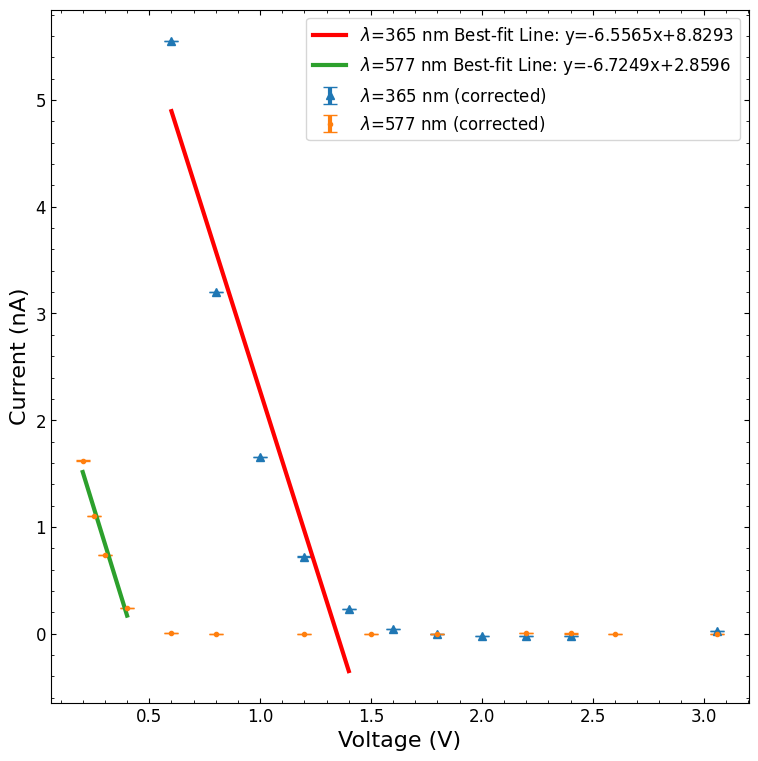

In [44]:
slr_3 = LinearRegression().fit(vu_1.transpose().reshape(-1,1), iu_1)
slr_4 = LinearRegression().fit(vu_2.transpose().reshape(-1,1), iu_2)
plt.errorbar(vc_1, ic_1, yerr= v_err, label="$\lambda$=365 nm (corrected)", linestyle='None', marker='^', capsize=5)
plt.errorbar(vc_2, ic_2, yerr= v_err, label="$\lambda$=577 nm (corrected)", linestyle='None', marker='.', capsize=5)
plt.plot(vu_1, slr_3.predict(vu_1.transpose().reshape(-1,1)),label='$\lambda$=365 nm Best-fit Line: y=-6.5565x+8.8293', color='red')
plt.plot(vu_2, slr_4.predict(vu_2.transpose().reshape(-1,1)),label='$\lambda$=577 nm Best-fit Line: y=-6.7249x+2.8596')
plt.legend()
plt.xlabel("Voltage (V)")
plt.ylabel("Current (nA)")
plt.savefig('CL_PE_3.jpg')

In [45]:
ch_3 = chi_squared_np(vu_1, iu_1, i_err, slr_3.coef_, slr_3.intercept_)
print(ch_3, slr_3.coef_, slr_3.intercept_)
ch_4 = chi_squared_np(vu_2, iu_2, i_err, slr_4.coef_, slr_4.intercept_)
print(ch_4, slr_4.coef_, slr_4.intercept_)

16300319.999999985 [-6.55654527] 8.829313544524815
399291.4285714298 [-6.72493126] 2.859692454279453


In [46]:
zero_1 = -slr_3.intercept_/slr_3.coef_
zero_2 = -slr_4.intercept_/slr_4.coef_
print(zero_1,zero_2)

[1.34664113] [0.42523743]


In [47]:
print(v_err)

0.0002886751345948129
